In [83]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [84]:
county = "Yilan_county"
path = f"../data/processed/{county}.csv"

try:
    df = pd.read_csv(path)
    df["date"] = pd.to_datetime(df["date"])
    df = df.set_index("date")
except FileNotFoundError:
    print("Can't find the county name.")

# Group by the sitename column and resample it by month to get the mean of pm2.5

In [85]:
pollutant = "pm2.5"
df_monthly = df.groupby("sitename").resample("ME")[pollutant].mean().reset_index()
df_monthly

,sitename,date,pm2.5
0,Dongshan,2016-11-30,10.636364
1,Dongshan,2016-12-31,11.430020
2,Dongshan,2017-01-31,12.921331
3,Dongshan,2017-02-28,15.899317
4,Dongshan,2017-03-31,15.140118
...,...,...,...
188,Yilan (Zhuangwei),2022-11-30,6.131657
189,Yilan (Zhuangwei),2022-12-31,6.878581
190,Yilan (Zhuangwei),2023-01-31,11.728650
191,Yilan (Zhuangwei),2023-02-28,9.887387


# Extract the year and month data

In [86]:
df_monthly["year"] = df_monthly["date"].dt.year
df_monthly["month"] = df_monthly["date"].dt.month
df_monthly

,sitename,date,pm2.5,year,month
0,Dongshan,2016-11-30,10.636364,2016,11
1,Dongshan,2016-12-31,11.430020,2016,12
2,Dongshan,2017-01-31,12.921331,2017,1
3,Dongshan,2017-02-28,15.899317,2017,2
4,Dongshan,2017-03-31,15.140118,2017,3
...,...,...,...,...,...
188,Yilan (Zhuangwei),2022-11-30,6.131657,2022,11
189,Yilan (Zhuangwei),2022-12-31,6.878581,2022,12
190,Yilan (Zhuangwei),2023-01-31,11.728650,2023,1
191,Yilan (Zhuangwei),2023-02-28,9.887387,2023,2


# Draw the heat map by month

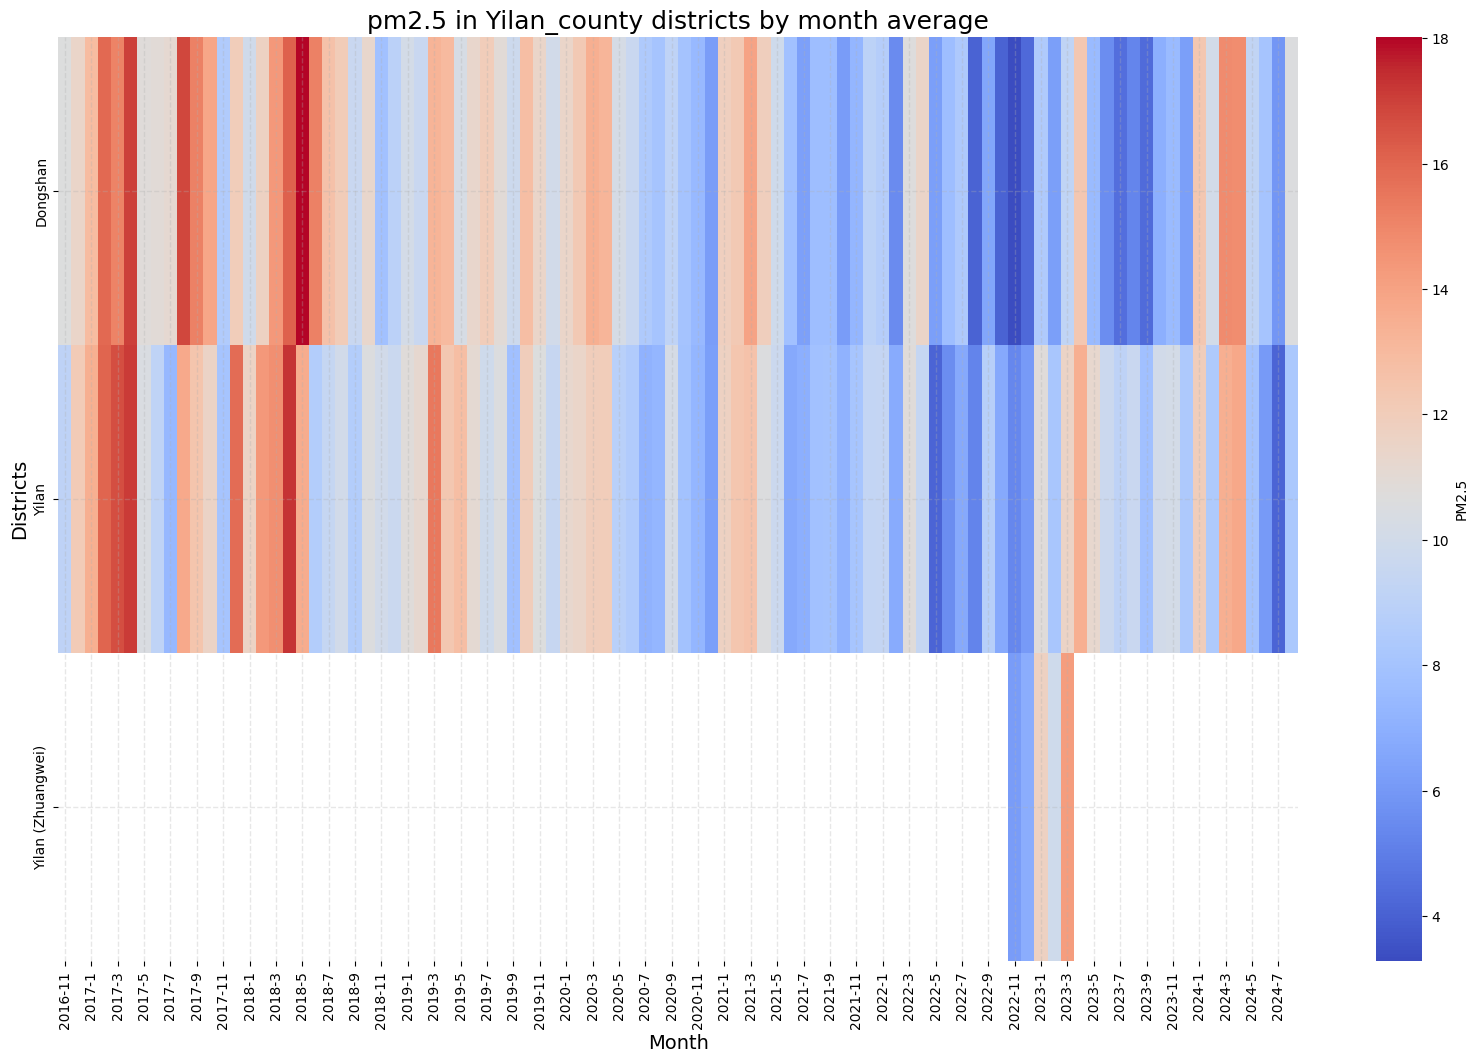

In [87]:
df_pivot = df_monthly.pivot_table(values=pollutant, index="sitename", columns=["year", "month"])

plt.figure(figsize=(20, 12))
sns.heatmap(data=df_pivot, cmap="coolwarm", cbar_kws={"label": "PM2.5"})
plt.title(f"{pollutant} in {county} districts by month average", fontsize=18)
plt.xlabel("Month", fontsize=14)
plt.ylabel("Districts", fontsize=14)
plt.grid(linestyle="--", linewidth=1, alpha=0.3)

# save the figure
path = f"../figure/(HM){county}_{pollutant}_month.png"
os.makedirs(os.path.dirname(path), exist_ok=True)
plt.savefig(path, dpi=600, bbox_inches="tight")

plt.show()

# Group by the sitename column and resample it by year to get the mean of pm2.5

In [88]:
pollutant = "pm2.5"
df_yearly = df.groupby("sitename").resample("YE")[pollutant].mean().reset_index()

df_yearly["year"] = df_yearly["date"].dt.year
df_yearly

,sitename,date,pm2.5,year
0,Dongshan,2016-12-31,11.336315,2016
1,Dongshan,2017-12-31,13.460148,2017
2,Dongshan,2018-12-31,12.526835,2018
3,Dongshan,2019-12-31,11.275733,2019
4,Dongshan,2020-12-31,9.807399,2020
5,Dongshan,2021-12-31,10.009824,2021
6,Dongshan,2022-12-31,6.784424,2022
7,Dongshan,2023-12-31,7.016127,2023
8,Dongshan,2024-12-31,10.711701,2024
9,Yilan,2016-12-31,11.753606,2016


# Draw the heat map by year

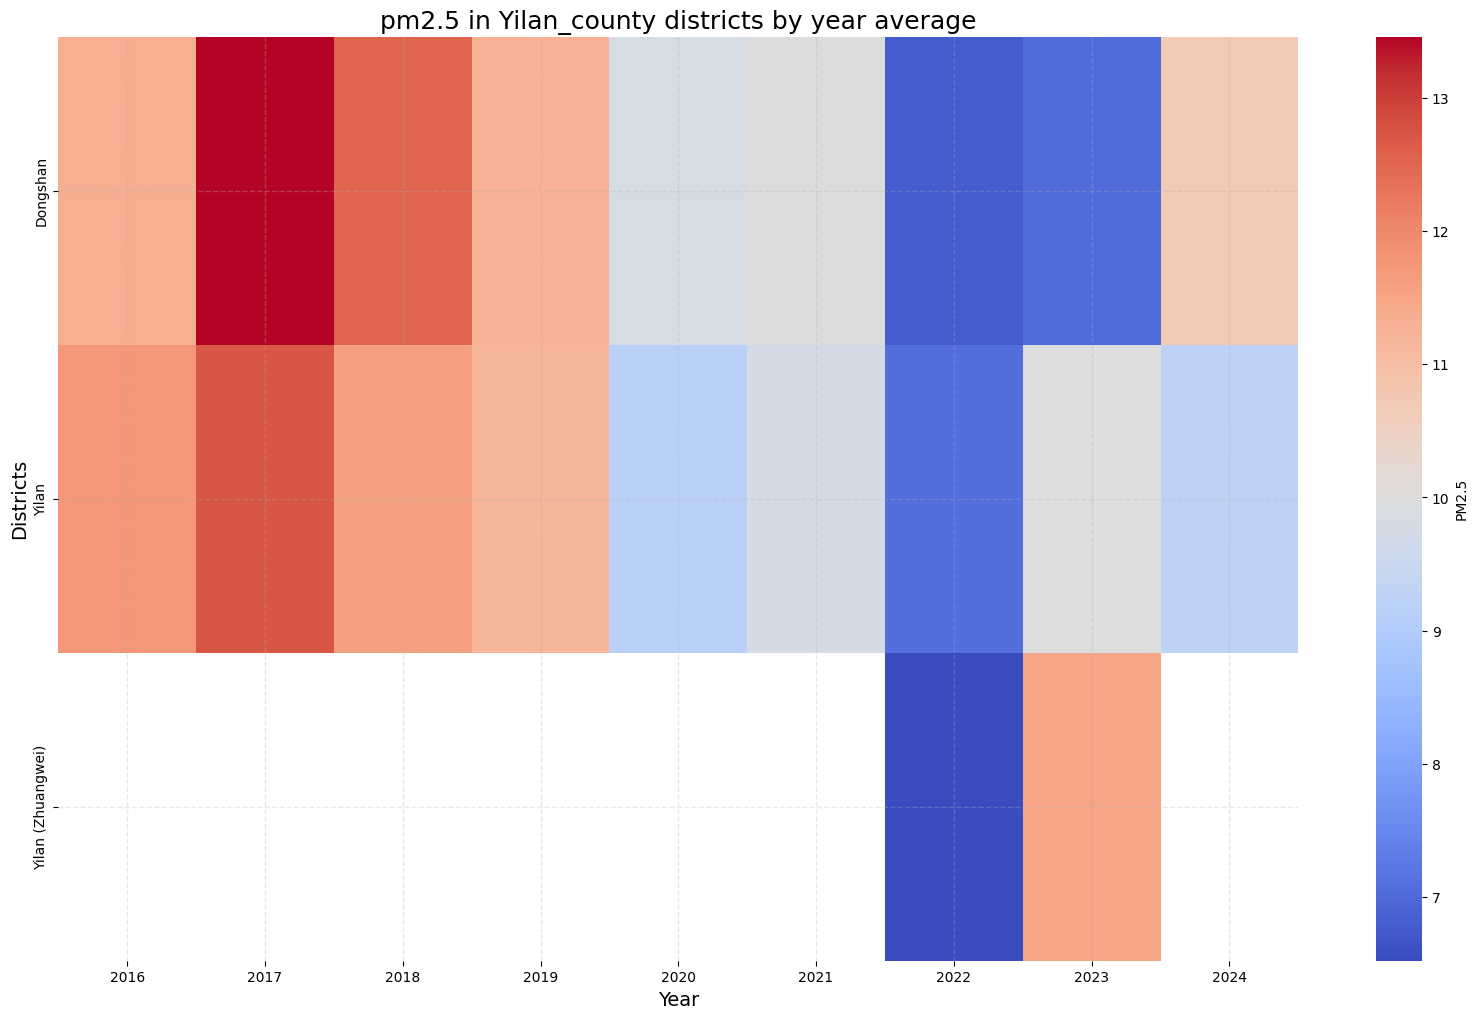

In [89]:
df_pivot = df_yearly.pivot_table(values=pollutant, index="sitename", columns=["year"])

plt.figure(figsize=(20, 12))
sns.heatmap(data=df_pivot, cmap="coolwarm", cbar_kws={"label": "PM2.5"})
plt.title(f"{pollutant} in {county} districts by year average", fontsize=18)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Districts", fontsize=14)
plt.grid(linestyle="--", linewidth=1, alpha=0.3)

# save the figure
path = f"../figure/(HM){county}_{pollutant}_year.png"
os.makedirs(os.path.dirname(path), exist_ok=True)
plt.savefig(path, dpi=600, bbox_inches="tight")

plt.show()